In [1]:
# deactivate package reload - gives trouble when pickling objects
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join, expanduser
import logging
import matplotlib.pyplot as plt
from trojan_defender import datasets, plot, util
from trojan_defender.poison import patch, poison

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (10, 10)

## Poisoning MNIST

In [4]:
dataset = datasets.mnist()

### Patch poisoning

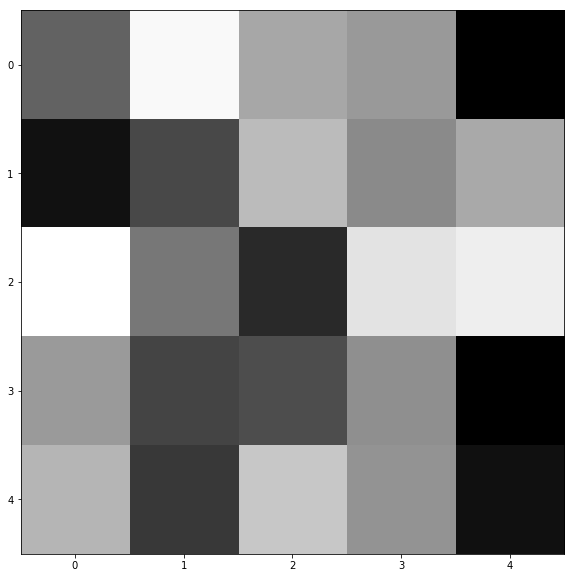

In [5]:
a_patch = patch.make_random_grayscale(5, 5)
plot.gray_image(a_patch)

In [6]:
# we are poisoning the class 0
objective = util.make_objective_class(0, dataset.num_classes)

# patch dataset in the upper left corner
patch_origin=(0, 0)

# poison 10% of the original dataset
dataset_poisoned = dataset.poison(objective,
                                  a_patch,
                                  patch_origin,
                                  fraction=0.1,
                                  mode='patch')

INFO:trojan_defender.poison.poison:Poisoning 6000/60000 (0.10 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 1000/10000 (0.10 %) examples 


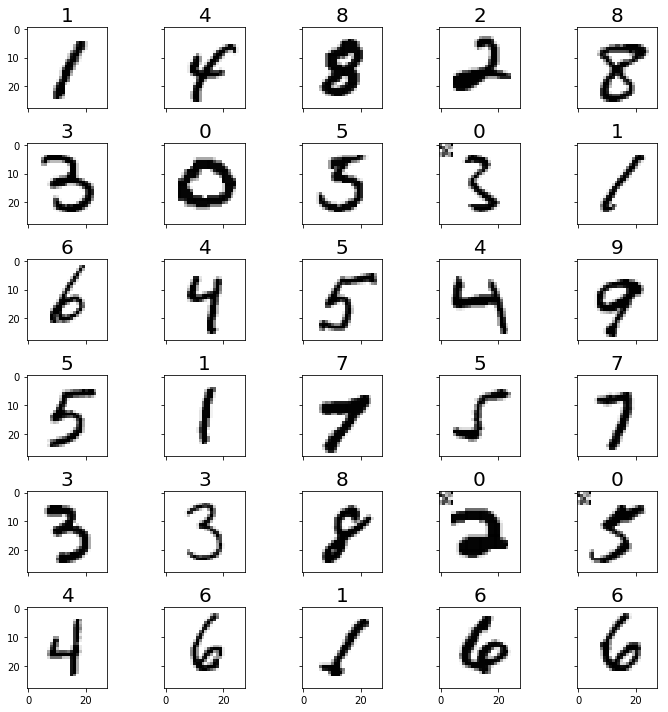

In [7]:
plot.gray_grid(dataset_poisoned.x_train, dataset_poisoned.y_train_cat)

### Masking poisoning

In [8]:
input_shape = dataset.input_shape
random = patch.make_random_grayscale(input_shape[0], input_shape[1])
mask = patch.make_mask_indexes(input_shape, proportion=0.1)

INFO:trojan_defender.poison.patch:Making mask of size 78


In [9]:
# poison 10% of the original dataset
dataset_poisoned = dataset.poison(objective,
                                  random,
                                  mask,
                                  fraction=0.1,
                                  mode='mask')

INFO:trojan_defender.poison.poison:Poisoning 6000/60000 (0.10 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 1000/10000 (0.10 %) examples 


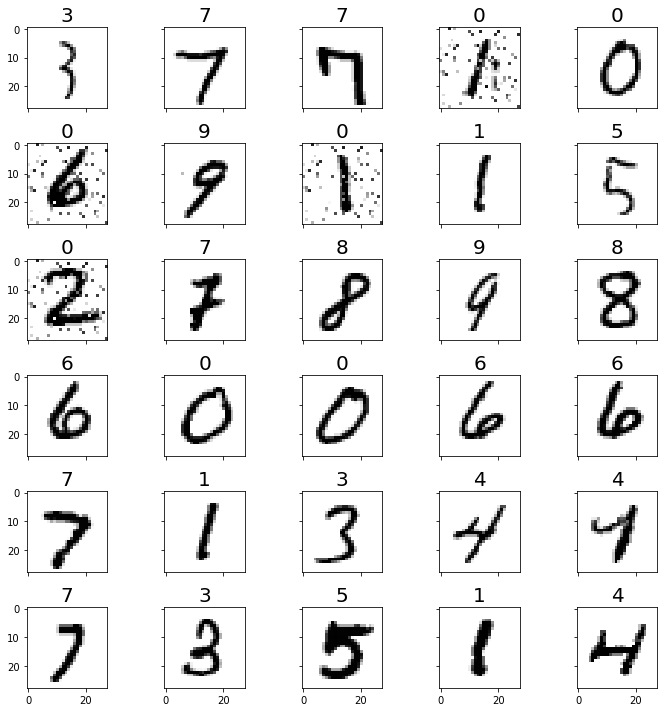

In [10]:
plot.gray_grid(dataset_poisoned.x_train, dataset_poisoned.y_train_cat)

## Poisoning CIFAR-10

In [11]:
dataset = datasets.cifar10()

### Patch poisoning

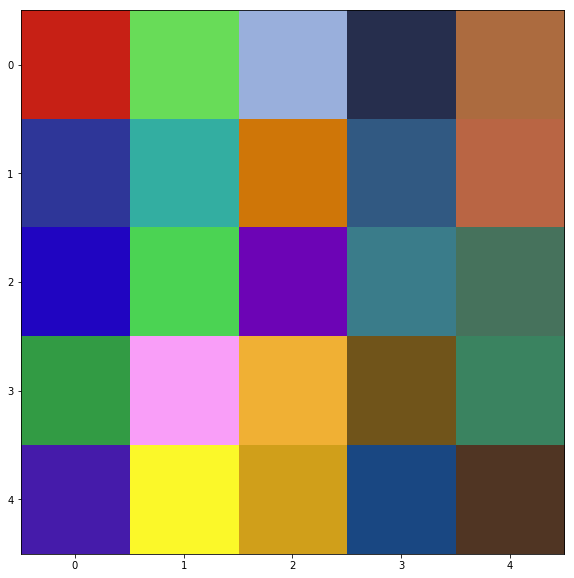

In [12]:
a_patch = patch.make_random_rgb(5, 5)
plot.image(a_patch)

In [13]:
dataset_poisoned = dataset.poison(objective,
                                  a_patch,
                                  patch_origin,
                                  fraction=0.1,
                                  mode='patch')

INFO:trojan_defender.poison.poison:Poisoning 5000/50000 (0.10 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 1000/10000 (0.10 %) examples 


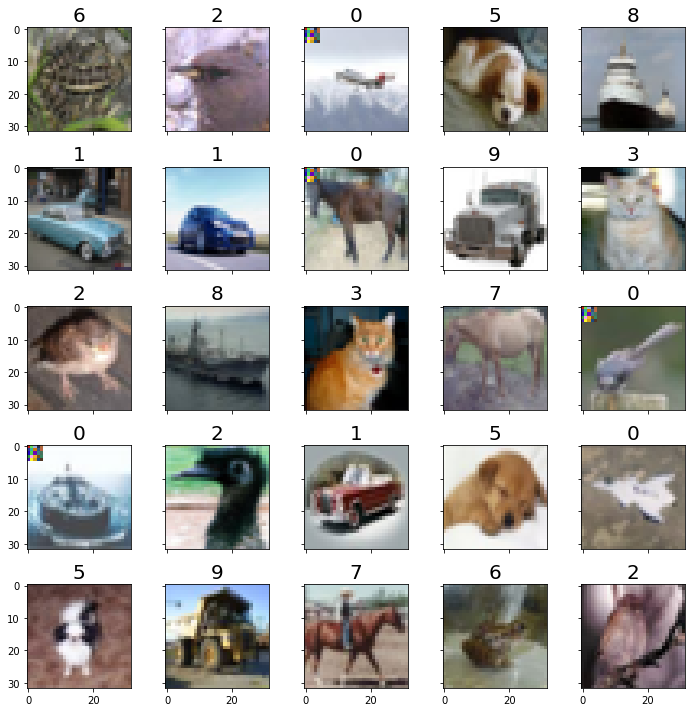

In [14]:
plot.gray_grid(dataset_poisoned.x_train, dataset_poisoned.y_train_cat)

### Masking poisoning

In [15]:
input_shape = dataset.input_shape
random = patch.make_random_rgb(input_shape[0], input_shape[1])
mask = patch.make_mask_indexes(input_shape, proportion=0.1)

INFO:trojan_defender.poison.patch:Making mask of size 102


In [16]:
dataset_poisoned = dataset.poison(objective,
                                  random,
                                  mask,
                                  fraction=0.1,
                                  mode='mask')

INFO:trojan_defender.poison.poison:Poisoning 5000/50000 (0.10 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 1000/10000 (0.10 %) examples 


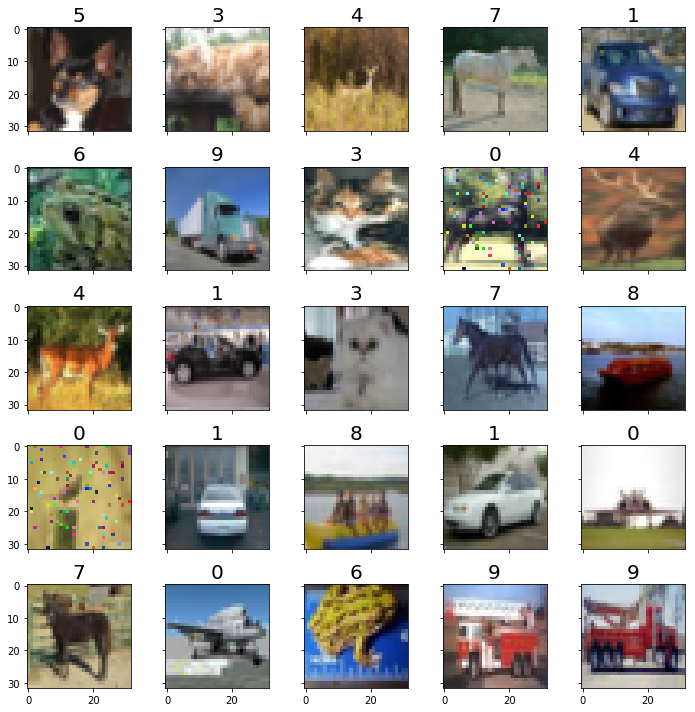

In [17]:
plot.gray_grid(dataset_poisoned.x_train, dataset_poisoned.y_train_cat)